In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
from scipy import interpolate
directory = "./npy_saves/"

In [2]:
def calculateAUC(bin_counts,bin_accuracies,excl_num):
    """Function for calculating Misclassified Area based on found binAccuracies
  
    Args:
      bin_counts: A numpy vector of N numbers, indicating how many validation samples there are in each bin
      bin_accuracies: A numpy vector of N numbers, indicating the true accuracy of each bin when compared to ground truth
      excl_num: exclusion of bins with lower count than the given number
    
    Returns:
      AUC: Float value equal to the difference in area between calibration graph, and ideal calibration
      bin_accuracies: Same as input vector, but where all near empty bins have been excluded, and where end points have been added
      bin_uncertainties: Uncertainty vector of equal length to bin_accuracies, with same filter procedure applied
    """
    
    #Finding uncertainty values based on number of bins
    bin_uncertainties = 1/(2*len(bin_counts))+1/len(bin_counts)*np.arange(0,len(bin_counts))
    
    #Removing bins with <excl_num samples
    bin_uncertainties = bin_uncertainties[bin_counts>excl_num] 
    bin_accuracies = bin_accuracies[bin_counts>excl_num]

    #Removing empty bins
    bin_uncertainties = bin_uncertainties[np.isnan(bin_accuracies)==False] 
    bin_accuracies = bin_accuracies[np.isnan(bin_accuracies)==False] 
    
    #adding 0, 0.1 and 1 to the end of accuracy and uncertainty so lines meet at the ends 
    bin_accuracies=np.append(bin_accuracies,[1])
    bin_uncertainties=np.append(bin_uncertainties,[1])
    bin_accuracies=np.insert(bin_accuracies,0,[0.1])
    bin_uncertainties=np.insert(bin_uncertainties,0,[0.1])
    bin_accuracies=np.insert(bin_accuracies,0,[0])
    bin_uncertainties=np.insert(bin_uncertainties,0,[0])

    #Integrating difference in area
    AUC = np.abs(np.trapz(bin_uncertainties,abs(bin_accuracies-bin_uncertainties)))
        
    return AUC, bin_accuracies, bin_uncertainties

Text(0.5, 1.0, 'CIFAR-10')

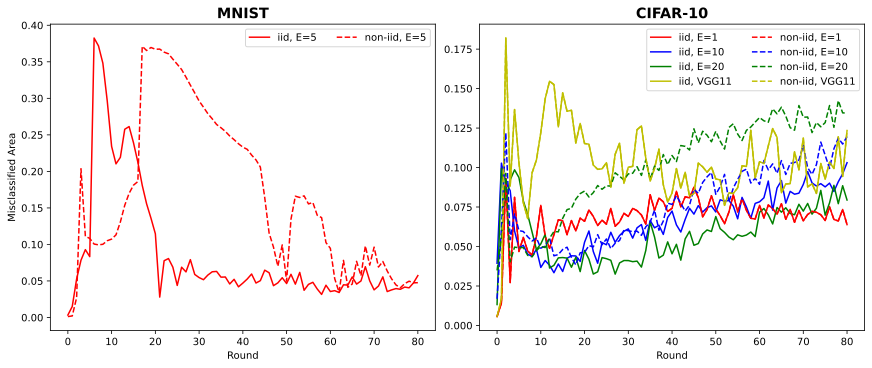

In [14]:
""" Plots for showing misclassified area as function of rounds"""

IDs = ["iid-MNIST","non-iid-MNIST"]
names = ["iid, E=5","non-iid, E=5"]

IDs2 = ["non_iid-1E_Cifar", "iid-20E_Cifar", "iid-Cifar", "non_iid-VGG11_Cifar", "non_iid-1E_Cifar", "non-iid-Cifar", "non_iid-20E_Cifar", "non_iid-VGG11_Cifar"]
names2 = ["iid, E=1", "iid, E=10", "iid, E=20", "iid, VGG11", "non-iid, E=1", "non-iid, E=10", "non-iid, E=20", "non-iid, VGG11"]

rounds = 81
bins = 40
excl_num = 30


fig, ax = plt.subplots(1,2,layout='constrained',figsize=(12,5))

#######################
col = ['r-','r--']    
AUC = np.zeros((rounds,len(IDs)))
for i in range(0,len(IDs)):
    bin_counts = np.load(directory+IDs[i]+"/"+IDs[i]+"_binCounts.npy")
    bin_accuracies = np.load(directory+IDs[i]+"/"+IDs[i]+"_accVunc.npy")
    for r in range(0,rounds):
        AUC[r,i] = calculateAUC(bin_counts[r,:],bin_accuracies[r,:],excl_num)[0]   
    
for i in range(0,len(IDs)):
    ax[0].plot(range(0,rounds),AUC[:,i],col[i])
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Misclassified Area")
ax[0].legend(names,ncol=2) 
ax[0].set_title('MNIST',fontsize='x-large',fontweight='bold')

##################
col = ['r-','b-','g-','y-','r--','b--','g--','y--']
AUC = np.zeros((rounds,len(IDs2)))
for i in range(0,len(IDs2)):
    bin_counts = np.load(directory+IDs2[i]+"/"+IDs2[i]+"_binCounts.npy")
    bin_accuracies = np.load(directory+IDs2[i]+"/"+IDs2[i]+"_accVunc.npy")
    for r in range(0,rounds):
        AUC[r,i] = calculateAUC(bin_counts[r,:],bin_accuracies[r,:],excl_num)[0]   
    
for i in range(0,len(IDs2)):
    ax[1].plot(range(0,rounds),AUC[:,i],col[i])
ax[1].set_xlabel("Round")
ax[1].legend(names2,ncol=2) 
ax[1].set_title('CIFAR-10',fontsize='x-large',fontweight='bold')


Text(0.02, 0.55, 'Accuracy')

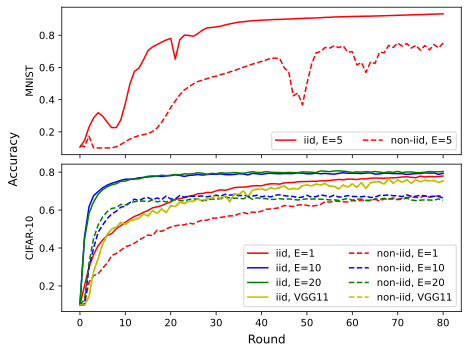

In [15]:
""" Plots for showing Accuracy as function of rounds"""

IDs = ["iid-MNIST","non-iid-MNIST"]
names = ["iid, E=5","non-iid, E=5"]

IDs2 = ["iid-1E_Cifar", "iid-20E_Cifar", "iid-Cifar", "non_iid-VGG11_Cifar", "non_iid-1E_Cifar", "non-iid-Cifar", "non_iid-20E_Cifar", "non_iid-VGG11_Cifar"]
names2 = ["iid, E=1", "iid, E=10", "iid, E=20", "iid, VGG11", "non-iid, E=1", "non-iid, E=10", "non-iid, E=20", "non-iid, VGG11"]

col = ['r-','r--','b-','b--','g-','g--','m-','m--']
rounds = 81

fig, ax = plt.subplots(2,1,sharex=True,layout='constrained')

col = ['r-','r--']
Accuracy = np.zeros((len(IDs),rounds))
for i in range(0,len(IDs)):
    Accuracy = np.load(directory+IDs[i]+"/"+IDs[i]+"_overall_accuracy.npy")[:rounds]
    ax[0].plot(range(0,rounds),Accuracy,col[i])
ax[0].set_ylabel("MNIST")
ax[0].legend(names,loc='lower right',ncol=2)

col = ['r-','b-','g-','y-','r--','b--','g--','y--']
Accuracy = np.zeros((len(IDs2),rounds))
for i in range(0,len(IDs2)):
    Accuracy = np.load(directory+IDs2[i]+"/"+IDs2[i]+"_overall_accuracy.npy")[:rounds]
    ax[1].plot(range(0,rounds),Accuracy,col[i])
ax[1].set_ylabel("CIFAR-10")
ax[1].legend(names2,loc='lower right',ncol=2)


fig.supxlabel('Round',x=0.57)
fig.supylabel('Accuracy',y=0.55)


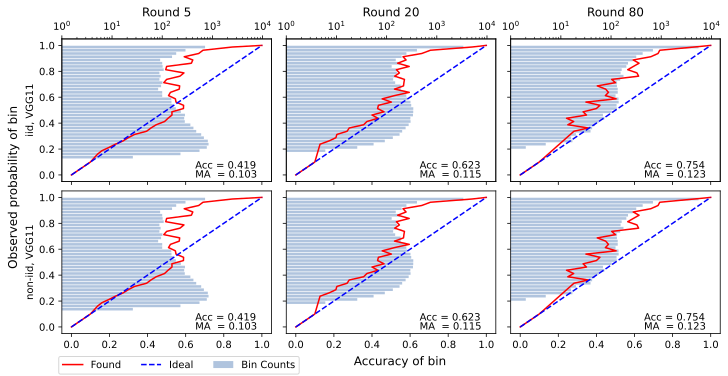

In [17]:
""" Plotting Calibration graphs for select rounds and tests"""

#IDs = ["non_iid-1E_Cifar","non_iid-1E_Cifar","iid-Cifar","non-iid-Cifar","iid-20E_Cifar","non_iid-20E_Cifar"]
#names = ["iid, E=1","non-iid, E=1","iid, E=10","non-iid, E=10","iid, E=20","non-iid, E=20"]
#IDs = ["iid-MNIST","non-iid-MNIST"]
#names = ["iid, E=5","non-iid, E=5"]
IDs = ["non_iid-VGG11_Cifar","non_iid-VGG11_Cifar"]
names = ["iid, VGG11","non-iid, VGG11"]
rounds = 81
rounds2plot = [5,20,80]
bins = 40
excl_num = 30

#fig, ax = plt.subplots(len(IDs),len(rounds2plot), sharex=True,sharey=True,layout='constrained',figsize=(10,14.1))
fig, ax = plt.subplots(len(IDs),len(rounds2plot), sharex=True,sharey=True,layout='constrained',figsize=(10,5.1))
for i in range(0,len(IDs)):
    bin_counts = np.load(directory+IDs[i]+"/"+IDs[i]+"_binCounts.npy")
    bin_accuracies = np.load(directory+IDs[i]+"/"+IDs[i]+"_accVunc.npy")   
    Accuracy= np.load(directory+IDs[i]+"/"+IDs[i]+"_overall_accuracy.npy")
    for j in range(0,len(rounds2plot)):
        r = rounds2plot[j]
        cur_bin_accuracies = bin_accuracies[r,:]
        AUC, cur_bin_accuracies, cur_bin_uncertainties = calculateAUC(bin_counts[r,:],bin_accuracies[r,:],excl_num)
        
        ax1 = ax[i,j]
        ax2 = ax1.twiny()
        ax2.set_xlim([1,10**4+5000])
        if i == 0 and j==0:
            bin_uncertainties = 1/(2*bins)+1/bins*np.arange(0,bins)
            ax2.barh(bin_uncertainties,bin_counts[r,:],height=0.02,log=True,color='lightsteelblue', label = "Bin Counts")
            ax1.plot(cur_bin_accuracies, cur_bin_uncertainties,'r-', label = "Found")
            ax1.plot([0,1],[0,1],'b--', label = "Ideal")
        else:
            ax2.barh(bin_uncertainties,bin_counts[r,:],height=0.02,log=True,color='lightsteelblue')
            ax1.plot(cur_bin_accuracies,cur_bin_uncertainties,'r-')
            ax1.plot([0,1],[0,1],'b--')            

        ax1.text(0.65,0.05,'Acc = '+ str(round(Accuracy[r],3)))
        ax1.text(0.65,-0.02,'MA  = '+ str(round(AUC ,3)))
        if i == 0:
            ax1.set_title("Round "+str(r))
        if j == 0:
            ax1.set_ylabel(names[i])
        if i != 0:
            ax2.axis('off')
        ax1.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2
        ax1.patch.set_visible(False) # hide the 'canvas'

fig.supxlabel('Accuracy of bin',x=0.55)
fig.supylabel('Observed probability of bin')
fig.legend(loc = [0.08,0.005],ncol=3)

Text(0, 0.5, 'Accuracy')

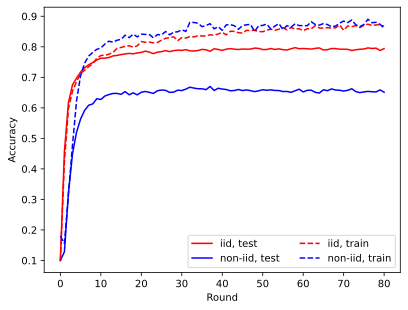

In [6]:
""" Plotting test and training accuracy for Cifar 20 Epoch, for checking for overfitting"""

IDs = ["iid-20E_Cifar","non_iid-20E_Cifar"]
names = ["iid, test","non-iid, test","iid, train","non-iid, train"]
col = ['r-','b-','r--','b--']
rounds = 81

plt.figure()
testAccuracy0 = np.load(directory+IDs[0]+"/"+IDs[0]+"_overall_accuracy.npy")[:rounds]
testAccuracy1 = np.load(directory+IDs[1]+"/"+IDs[1]+"_overall_accuracy.npy")[:rounds]
trainAccuracy0 = np.load(directory+IDs[0]+"/"+IDs[0]+"_train_accuracy.npy")[:rounds]
trainAccuracy1 = np.load(directory+IDs[1]+"/"+IDs[1]+"_train_accuracy.npy")[:rounds]
plt.plot(testAccuracy0,col[0])
plt.plot(testAccuracy1,col[1])
plt.plot(trainAccuracy0,col[2])
plt.plot(trainAccuracy1,col[3])

plt.legend(names,loc='lower right',ncol=2)
plt.xlabel('Round')
plt.ylabel('Accuracy')